# Light Intensity Calculations  
I want some documentation of how to calculate light intensity with photodiode SFH213 OSRAM Opto Semiconductors. From the datasheet, these seem like the crucial graphs, specially the one on the right. We can measure Vo or Ip, and they will have a linear relationship to illuminance (lx). 

![alt text](diode.png "SFH213 Characteristics")

In [15]:
#typical values according to datasheet
Vr = 5
Ip = 135 * 1e-6 #at 1000 lux
Vo = 430 * 1e-3 #at 1000 lux
darkCurrent = 1e-9

m = (1000 - 0) / (Ip-darkCurrent) 
I2lux = lambda I: m * I + darkCurrent
I = lambda V: V / 330
V2lux = lambda V: I2lux(I(V))

If I get this right, dark current is like the intercept, and we have one value of current at 1000 lux, so we should be able to get the slope and re-create the graph above. The weird part is that lux is on the x-axis, although it is actually the variable that we want. So I'm going to plot it the other way around. 

Text(0.5, 1.0, 'Current to Lux Conversion')

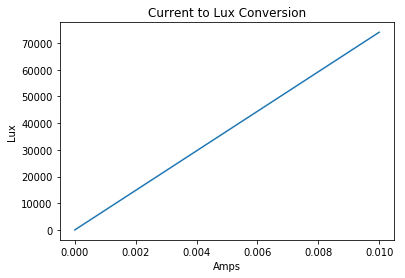

In [16]:
import numpy as np
import matplotlib.pyplot as plt


plt.plot([w*1e-6 for w in range(10000)],[I2lux(w*1e-6) for w in range(10000)])
plt.xlabel('Amps')
plt.ylabel('Lux')
plt.title('Current to Lux Conversion')

Now let's do the same for voltage, as it is more convenient since that is what is being outputted from the oscilloscope. 

Text(0.5, 1.0, 'Voltage to Lux Conversion')

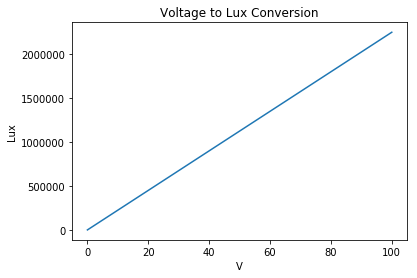

In [20]:
urange = int(10*1e4)
plt.plot([w*1e-3 for w in range(urange)], [V2lux(w*1e-3) for w in range(urange)])
plt.xlabel('V')
plt.ylabel('Lux')
plt.title('Voltage to Lux Conversion')

## Oscilloscope Samples  
I generated a digital signal that powered an LED in a specific pattern, which I then recorded from a photodiode into a Rigol DS1052E oscilloscope. I saved the waveform from the oscilloscope onto a USB. Here I import the corresponding csv file and visualize it. 

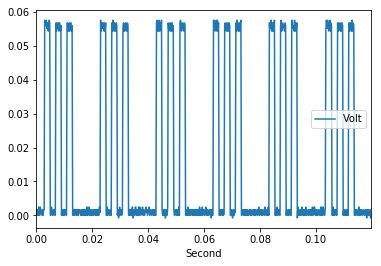

In [76]:
import pandas as pd

wave = pd.read_csv('test_waveform.csv')
wave = wave.rename(columns={'X':'Second','CH1':'Volt'})
wave = wave.iloc[1:]
wave['Second'] = wave['Second'].astype('float64', inplace=True)
wave['Volt'] = wave['Volt'].astype('float64', inplace=True)
wave['Second'] = wave['Second'] - wave['Second'].iloc[0]
wave.drop(columns=['Unnamed: 2'], inplace=True)

wave.plot('Second','Volt');